# U.S. Political Sentimental Analysis


## Breakdown by Month

This notebook will catergorize the sentiment result of Donald Trump and Hillary Clinton by the months across their election run (Jan 2016- Dec 2016). 

Sentimental analysis will be conducted using TextBlob. The sentiment.polarity function of textblob returns the polarity result. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 


In [1]:
import preprocessor as p
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import csv
import os
import sys


'''
Cleaned data
Output format is:
{Month1: [sentence 1], [sentence 2], [sentence3] ..., Month2: [sentence1]...}
'''

'\nCleaned data\nOutput format is:\n{Month1: [sentence 1], [sentence 2], [sentence3] ..., Month2: [sentence1]...}\n'

In [2]:
#keyword = input("Enter: \n [1] for trump \n [2] for hillary \n [3] for clinton \n")
# if (keyword == "1"):
#     keyword = "Trump"
# elif (keyword == "2"):
#     keyword = "Hillary"
# elif (keyword == "3"):
#     keyword = 
# else:
#     print("errrr......")
#     sys.exit()

def cleanData(keyword):
    tweets = dict()
    month = result = int()
    pre_clean_tweet = str()
    analyze_tweet = str()
    
    directory = "C:\\Users\\jingl\\OneDrive\\Documents\\GitHub\\DAP-Best-eggs\\GetOldTweets-python-master\\Exporter csv\\" + keyword
    #create dict with all months
    tweets = {"01":[], "02":[], "03":[], "04":[], "05":[], "06": [], "07":[], "08":[], 
              "09":[], "10":[], "11":[], "12": []}

    #loop thru all csv in the above directory
    for filename in os.listdir(directory):
        if filename.endswith(".csv"): 
            print("Running " + filename +" ...")

            with open(directory + "\\" + filename, encoding='utf8', errors="ignore") as csvfile:
                #skip column headers
                next(csvfile)
                for row in csvfile:
                    #in clinton file, we ignore tweets with hillary keyword inside
                    #to avoid duplicates
                    if (keyword == "Clinton"):
                        if ("hillary" in row.lower()):
                            continue
                    #data delimiter is seperated by ;
                    row = row.strip().split(";")

                    #split date extract month
                    month = row[1].split("-")
                    month = month[1]

                    #split actual tweet by sentence and clean each sentence
                    pre_clean_tweet = TextBlob(row[4].strip("\""))
                    pre_clean_tweet = pre_clean_tweet.sentences

                    for sentence in pre_clean_tweet:
                        sentence = p.clean(str(sentence))

                        if len(sentence) > 3: 
                            #populate dictionary as long as more than 3 characters
                            tweets[month].append(sentence)

    print ("DONE! \n")
    return tweets 

trump = cleanData("Trump")
hillary = cleanData("Hillary")
clinton = cleanData("Clinton")

Running 'TRUMP'_Apr2016.csv ...
Running 'TRUMP'_Aug2016.csv ...
Running 'TRUMP'_Dec2016.csv ...
Running 'TRUMP'_Feb2016.csv ...
Running 'TRUMP'_Jan2016.csv ...
Running 'TRUMP'_Mar2016.csv ...
Running 'TRUMP'_May2016.csv ...
Running 'TRUMP'_May2016_Incomplete.csv ...
Running Trump_Dec2016_Incomplete.csv ...
Running Trump_Jul2016.csv ...
Running Trump_Jun2016.csv ...
Running Trump_Jun2016_Error.csv ...
Running Trump_Nov2016.csv ...
Running Trump_Oct2016.csv ...
Running Trump_Sep2016.csv ...
DONE! 

Running Hillary_Apr2016.csv ...
Running Hillary_Aug2016.csv ...
Running Hillary_Dec2016.csv ...
Running Hillary_Feb2016.csv ...
Running Hillary_Jan2016.csv ...
Running Hillary_Jul2016.csv ...
Running Hillary_Jun2016.csv ...
Running Hillary_Mar2016.csv ...
Running Hillary_May2016.csv ...
Running Hillary_Nov2016.csv ...
Running Hillary_Oct2016.csv ...
Running Hillary_Sep2016.csv ...
DONE! 

Running Clinton_Apr2016.csv ...
Running Clinton_Aug2016.csv ...
Running Clinton_Dec2016.csv ...
Running Cl

In [3]:
def merge_dols(dol1, dol2):
    #combing dictionary of list
    '''
    {"01": [1,2,3]} and {"01": [4,5,6]}          --->      {"01" : [1,2,3,4,5,6]}
    '''
    
    keys = set(dol1).union(dol2)
    no = []
    return dict((k, dol1.get(k, no) + dol2.get(k, no)) for k in keys)

#merge the two dictionary - hillary and clinton
hillary_clinton = merge_dols(hillary, clinton)

#view first ten items in january key
print (type(hillary_clinton))
print (hillary_clinton["01"][:10])


<class 'dict'>
["Isn't it time for FBI to have a little chat with Hillary?", 'Waiting for SenSanders here.', 'Then going to see HillaryClinton and billclinton a few blocks', 'joavargas_1220 sgteatme2012 HillaryClinton SenSanders how?', "As a veteran myself i'd like to know how is he going to do better for me?", 'HillaryClinton billclinton They disappear all by them selfs.', 'Jail time lady', 'Will Hillary escape justice for her crimes?', 'Did Adolph and Eva escape to Argentina by sub?', 'jsinacore007 Hillary prolly served them up so the Chinese could hack into her server in exchange for a donation to the ClintonFoundation']


In [11]:
def getAverageSentiment(tweets):
    #loop thru each item the key
    #return average sentiment result
    #index 0 will represent January, index1 will be for February, so on so for...
    
    averages = list()
    freq = list()
    result = int()
    
    for month, tweet_sentence in tweets.items():
        for sentence in tweet_sentence:
            analyze_tweet = TextBlob(sentence)
            result += analyze_tweet.sentiment.polarity
            result = result / len(tweet_sentence)
        
        #averages will include average sentiment split by month
        averages.append(result)
        #freq will contain number of tweets in each month
        freq.append(len(tweet_sentence))
        result = 0
        
    return averages, freq
    

#retrieve average sentiment result and monthly tweet frequency
trump_results, trump_freq = getAverageSentiment(trump)
hillary_results, hillary_freq = getAverageSentiment(hillary_clinton)

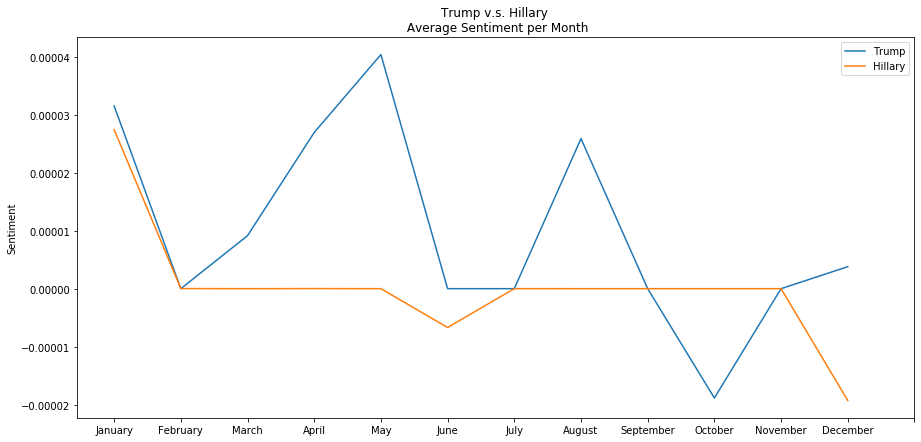

In [14]:
#plot line chart (showing change in sentiment in each month)
plt.plot(trump_results, label="Trump")
plt.plot(hillary_results, label="Hillary")

plt.title("Trump v.s. Hillary \n Average Sentiment per Month")
plt.ylabel('Sentiment')

x_ticks_labels = ["January","February","March","April","May","June","July","August","September","October","November","December"]
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks(x, x_ticks_labels)

plt.gcf().set_size_inches(15, 7)
plt.legend()

plt.show()


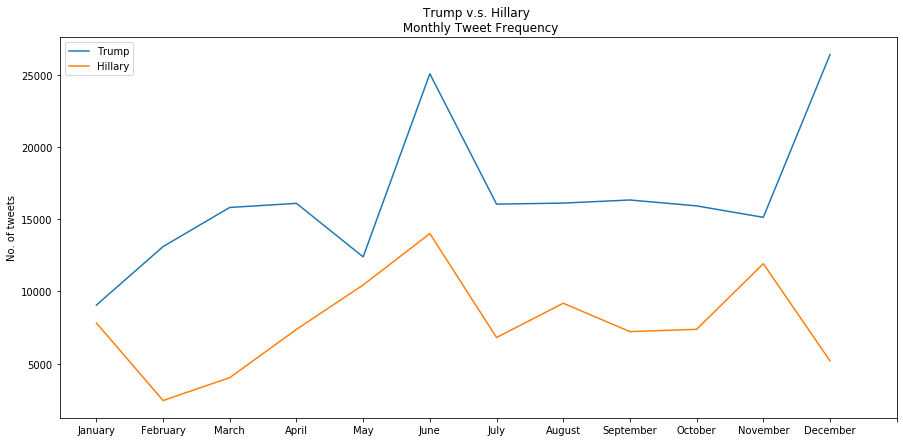

In [16]:
#now show total frequency of tweets per month
plt.plot(trump_freq, label="Trump")
plt.plot(hillary_freq, label="Hillary")

plt.title("Trump v.s. Hillary \n Monthly Tweet Frequency")
plt.ylabel('No. of tweets')

x_ticks_labels = ["January","February","March","April","May","June","July","August","September","October","November","December"]
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks(x, x_ticks_labels)

plt.gcf().set_size_inches(15, 7)
plt.legend()

plt.show()